In [1]:
%load_ext autoreload
%autoreload 2

In [20]:
import numpy as np
import joblib

from os.path import join
import matplotlib.pyplot as plt

In [29]:
# NAC_inception GT_inception GT2_inception
INFOS = dict(
    NAC_inception = dict(
        feat_size=2048,
        n_parts=21,
        parts=[
            # first scale
            "1_#405", "1_#39",  "1_#174", 
            "1_#80",  "1_#426", "1_#421", 
            "1_#397", "1_#422", "1_#135", 
            "1_#183", 
            # second scale
            "2_#405", "2_#39",  "2_#174", 
            "2_#80",  "2_#426", "2_#421", 
            "2_#397", "2_#422", "2_#135", 
            "2_#183", 
        ]
    ),
    GT_inception  = dict(
        feat_size=2048,
        n_parts=16,
        parts=["back", "beak", "belly", "breast", 
               "crown", "forehead", "left_eye", 
               "left_leg", "left_wing", "nape", 
               "right_eye", "right_leg", "right_wing", 
               "tail", "throat", ]
    ),
    GT2_inception = dict(
        feat_size=2048,
        n_parts=5,
        parts=["head", "body", "tail", "legs"]
    ),
)


In [92]:
clf0 = joblib.load("clf_{}_{}.npz".format("GT_inception", "all_parts"))
clf1 = joblib.load("clf_{}_{}.npz".format("GT_inception", "local_parts"))

In [105]:
(clf0.coef_[:, :-2048] - clf1.coef_).mean(axis=0)

array([1.86753881e-05, 6.83797439e-05, 5.95009363e-05, ...,
       4.61220221e-05, 9.63125663e-05, 2.18983617e-05])

In [86]:
def weight_norm(dataset, suffix, n_parts):
    global INFOS
    info = INFOS[dataset]
    clf = joblib.load("clf_{}_{}.npz".format(dataset, suffix))
    assert clf.coef_.shape[1] == n_parts * info["feat_size"], \
        "number of _coefs should be {} but was {}".format(
            n_parts * info["feat_size"], clf.coef_.shape[1])
    weights = clf.coef_.reshape(-1, n_parts, info["feat_size"])
    return np.sqrt((weights**2).sum(axis=-1))

def plot_weights(dataset, suffix, n_parts, part_names=None, normalize=True):
    fig, axs = plt.subplots(figsize=(16, 4))
    w_norm = weight_norm(dataset, suffix, n_parts)
    #axs.bar(range(n_parts), w_norm.mean(axis=0))
    if normalize:
        w_norm /= w_norm.max()
    axs.boxplot(w_norm, showfliers=False)
    axs.set_title(dataset)
    axs.set_xticks(np.arange(n_parts)+1)
    if part_names is not None:
        axs.set_xticklabels(part_names, rotation=45)
    plt.show()
    plt.close()

# SVM with all parts used

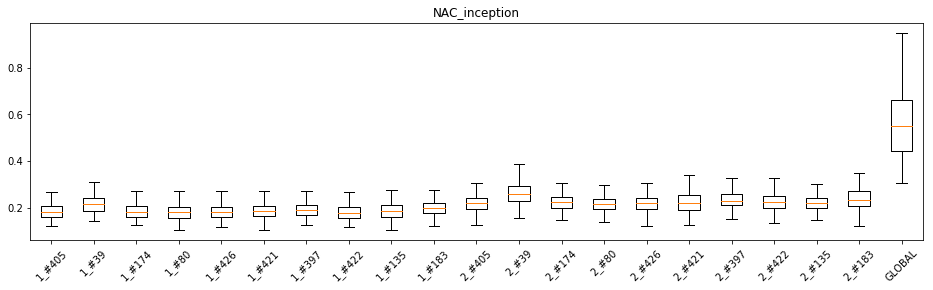

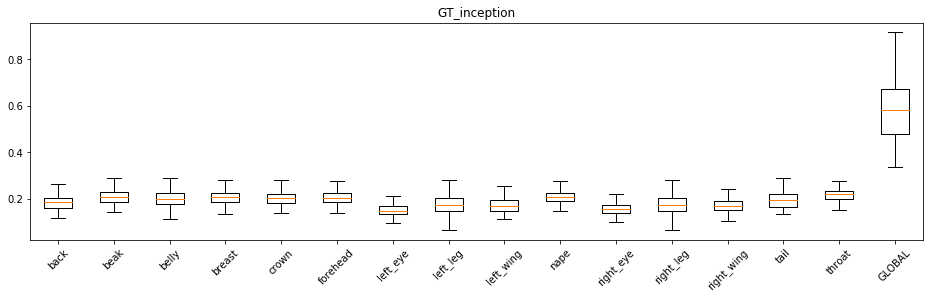

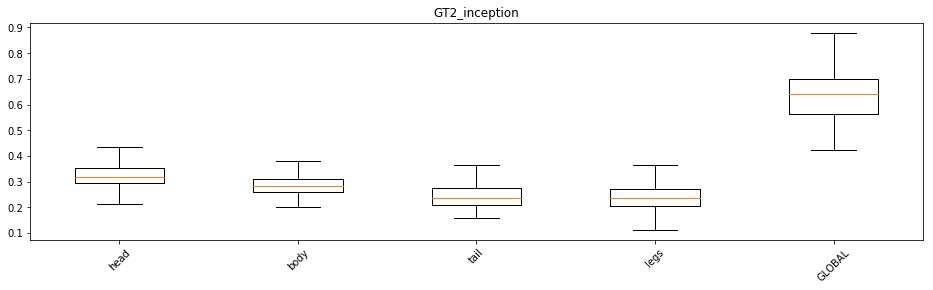

In [87]:
for dataset, info in INFOS.items():
    plot_weights(dataset, "all_parts", info["n_parts"], info["parts"] + ["GLOBAL"])

# SVM with only local parts used

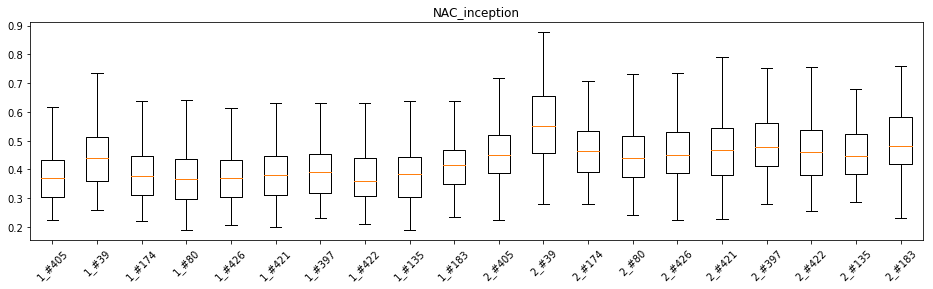

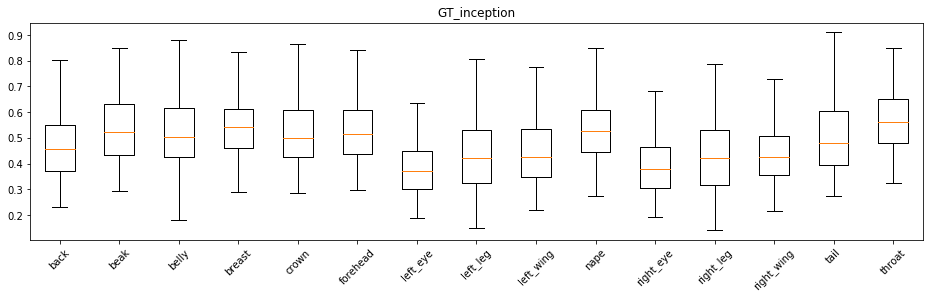

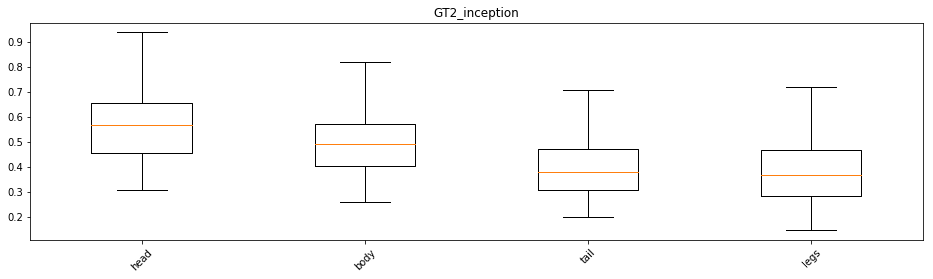

In [88]:
for dataset, info in INFOS.items():
    plot_weights(dataset, "local_parts", info["n_parts"] - 1, info["parts"])
    

# SVM with all parts, but shuffled local parts

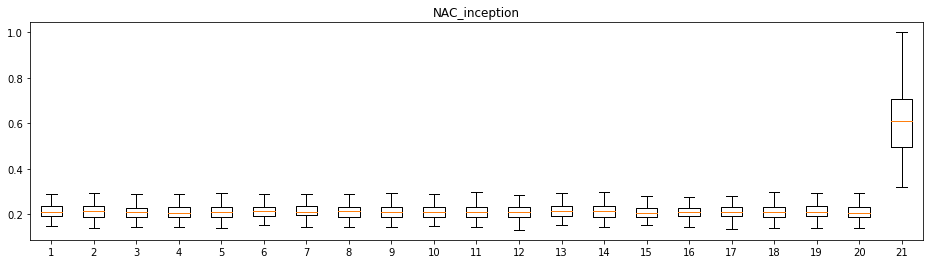

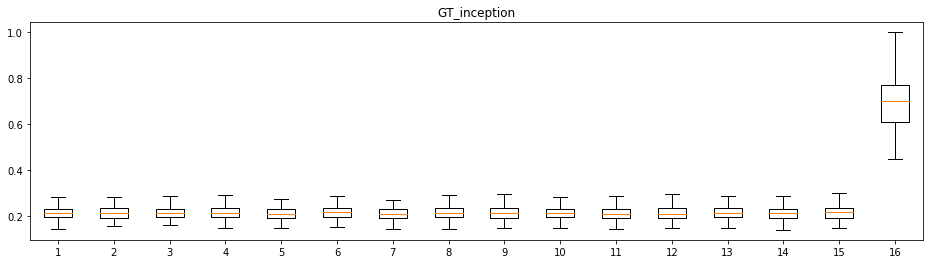

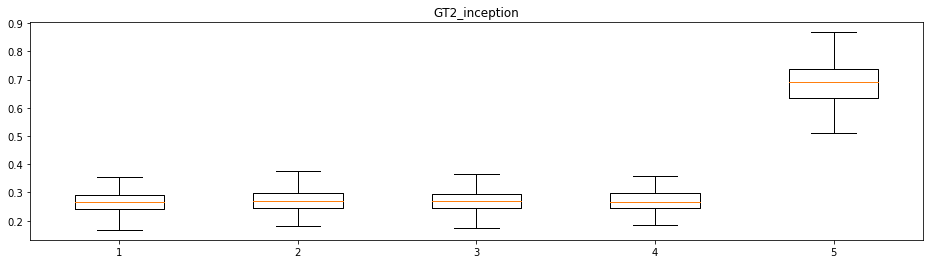

In [89]:
for dataset, info in INFOS.items():
    plot_weights(dataset, "all_parts_shuffled", info["n_parts"])

# SVM with local parts only, but shuffled

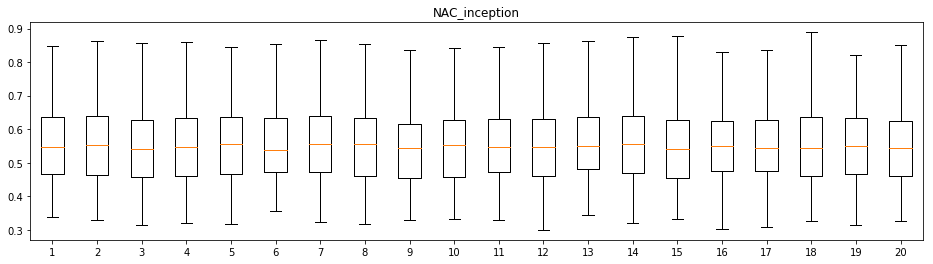

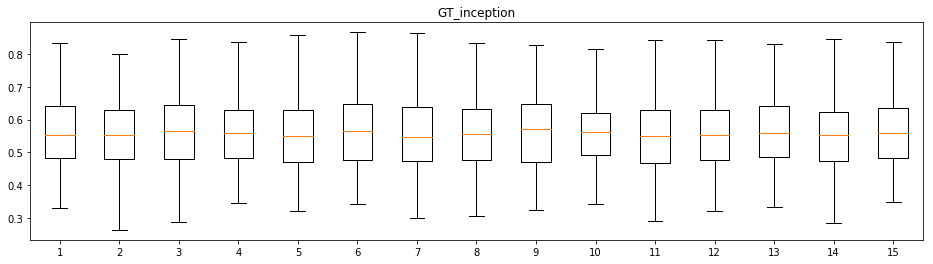

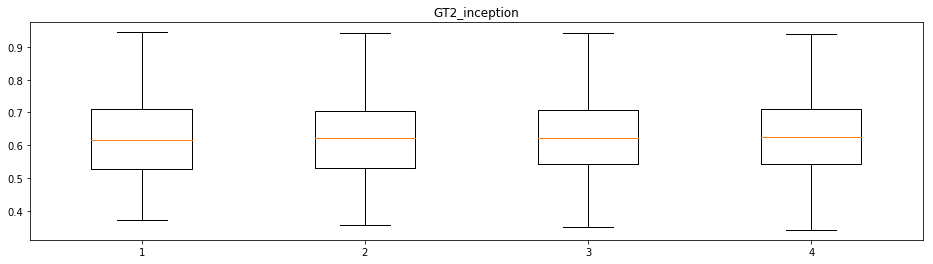

In [90]:
for dataset, info in INFOS.items():
    plot_weights(dataset, "local_parts_shuffled", info["n_parts"] - 1)